# Проект: Принятие решений в бизнесе

## Описание проекта

### Описание данных

**Данные для первой части**

Файл /datasets/hypothesis.csv.
- Hypothesis — краткое описание гипотезы;
- Reach — охват пользователей по 10-балльной шкале;
- Impact — влияние на пользователей по 10-балльной шкале;
- Confidence — уверенность в гипотезе по 10-балльной шкале;
- Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

**Данные для второй части**

Файл /datasets/orders.csv. 
- transactionId — идентификатор заказа;
- visitorId — идентификатор пользователя, совершившего заказ;
- date — дата, когда был совершён заказ;
- revenue — выручка заказа;
- group — группа A/B-теста, в которую попал заказ.

Файл /datasets/visitors.csv. 
- date — дата;
- group — группа A/B-теста;
- visitors — количество пользователей в указанную дату в указанной группе A/B-теста

### Контекст

Проводится анализ данных крупного интернет-магазина. Совместно с отделом маркетинга подготовлен список гипотез для увеличения выручки.
Необходимо приоритизировать гипотезы, запустить A/B-тест и проанализировать результаты.


**Часть 1. Приоритизация гипотез.**

В файле /datasets/hypothesis.csv 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.

**Задача**
1. Применить фреймворк ICE для приоритизации гипотез. Отсортировать их по убыванию приоритета.
2. Применить фреймворк RICE для приоритизации гипотез. Отсортировать их по убыванию приоритета.
3. Указать, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объяснить, почему так произошло.

**Часть 2. Анализ A/B-теста**

Проведен A/B-тест и получены результаты, которые описаны в файлах /datasets/orders.csv и /datasets/visitors.csv.


**Задача**


Проанализировать A/B-тест:
1. Построить график кумулятивной выручки по группам. Сделать выводы и предположения.
2. Построить график кумулятивного среднего чека по группам. Сделать выводы и предположения.
3. Построить график относительного изменения кумулятивного среднего чека группы B к группе A. Сделать выводы и предположения.
4. Построить график кумулятивного среднего количества заказов по группам. Сделать выводы и предположения.
5. Построить график относительного изменения кумулятивного среднего количества заказов группы B к группе A. Сделать выводы и предположения.
6. Построить точечный график количества заказов по пользователям. Сделать выводы и предположения.
7. Посчитать 95-й и 99-й перцентили количества заказов на пользователя. Выбрать границу для определения аномальных пользователей.
8. Построить точечный график стоимостей заказов. Сделать выводы и предположения.
9. Посчитать 95-й и 99-й перцентили стоимости заказов. Выбрать границу для определения аномальных заказов.
10. Посчитать статистическую значимость различий в среднем количестве заказов между группами по «сырым» данным. Сделать выводы и предположения.
11. Посчитать статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделать выводы и предположения.
12. Посчитать статистическую значимость различий в среднем количестве заказов между группами по «очищенным» данным. Сделать выводы и предположения.
13. Посчитать статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделать выводы и предположения.
14. Принять решение по результатам теста и объясните его. Варианты решений: 1. Остановить тест, зафиксировать победу одной из групп. 2. Остановить тест, зафиксировать отсутствие различий между группами. 3. Продолжить тест.

### Цель и объект анализа

1. **Объект анализа**: гипотезы по увеличению выручки интернет-магазина,
2. **Описание проблемы**: наличие большого списка гипотез, проверка всех гипотез стоит дорого с точки зрения,
3. **Задача**: приоретизировать, отсортировать в порядке убывания приоритета, провести анализ гипотез,
4. **Данные**: 
- `/datasets/hypothesis.csv` 9 гипотез по увеличению выручки интернет-магазина
- `/datasets/orders.csv` данные по заказам
- `/datasets/visitors.csv` данные по посещениям для анализа А/B теста

### Описание этапов анализа данных

Анализ данных будет происходить в несколько этапов:
- Предобработка данных с целью подготовки для анализа,
- Применение фреймворков ICE, RICE для приоретизации гипотез, анализ изменений в приоретизации гипотез,
- Построение кумулятивных и точечных графиков среднего чека, стоимости заказов, статистической значимости по группам,
- Формирование выводов.

## Загрузка данных и подготовка к анализу

#### Загрузка библиотек

In [1]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from pandas.plotting import register_matplotlib_converters
import warnings
# конвертеры, которые позволяют использовать типы pandas в matplotlib  
register_matplotlib_converters()

#### Загрузка данных

In [2]:
try:
    visitors = pd.read_csv('/datasets/visitors.csv')
    orders = pd.read_csv('/datasets/orders.csv')
    hypothesis = pd.read_csv('/datasets/hypothesis.csv')
except:
    visitors = pd.read_csv('/Users/bchain/Documents/Yandex_Practicum/projects/ab_tests/visitors.csv')
    orders = pd.read_csv('/Users/bchain/Documents/Yandex_Practicum/projects/ab_tests/orders.csv')
    hypothesis = pd.read_csv('/Users/bchain/Documents/Yandex_Practicum/projects/ab_tests/hypothesis.csv')

#### Проверка вывода данных

In [3]:
display('DataSet visitors:', visitors)
display('='*80)

display('DataSet orders:', orders)
display('='*80)

display('DataSet hypothesis:', hypothesis)

'DataSet visitors:'

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


'================================================================================'

'DataSet orders:'

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


'================================================================================'

'DataSet hypothesis:'

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


#### Предобработка данных

##### Названия столбцов

Переведем названия столбцов в нижний регистр, затем откорректируем названия, добавив пробелы с помощью нижнего подчеркивания

In [4]:
# Переводим в нижний регистр
orders.columns = map(str.lower, orders)
hypothesis.columns = map(str.lower, hypothesis)

# Корректируем названия с пробелами
orders = orders.rename(columns={'transactionid':'transaction_id', 
                                'visitorid':'visitor_id'})



display('DataSet visitors:', visitors)
display('='*80)

display('DataSet orders:', orders)
display('='*80)

display('DataSet hypothesis:', hypothesis)

'DataSet visitors:'

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


'================================================================================'

'DataSet orders:'

,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


'================================================================================'

'DataSet hypothesis:'

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


##### Проверка на дубликаты

Проверим все датасеты на наличие дубликатов строк в данных

In [5]:
display('DataSet visitors:', visitors[visitors.duplicated(keep='last')])
display('DataSet orders:',orders[orders.duplicated(keep='last')])
display('DataSet hypothesis:',hypothesis[hypothesis.duplicated(keep='last')])

'DataSet visitors:'

,date,group,visitors


'DataSet orders:'

,transaction_id,visitor_id,date,revenue,group


'DataSet hypothesis:'

,hypothesis,reach,impact,confidence,efforts


##### Вывод информации о дадасетах

In [6]:
display('DataSet visitors:')
visitors.info()
display('='*80)

display('DataSet orders:')
orders.info()
display('='*80)

display('DataSet hypothesis:')
hypothesis.info()

'DataSet visitors:'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


'================================================================================'

'DataSet orders:'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   transaction_id  1197 non-null   int64 
 1   visitor_id      1197 non-null   int64 
 2   date            1197 non-null   object
 3   revenue         1197 non-null   int64 
 4   group           1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


'================================================================================'

'DataSet hypothesis:'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   hypothesis  9 non-null      object
 1   reach       9 non-null      int64 
 2   impact      9 non-null      int64 
 3   confidence  9 non-null      int64 
 4   efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


В датасетах visits, orders, costs пропуски отсутствуют. Несмотря на то, что параметр `date` имеет тип `object`, мы не станем переводить в формат даты, а будем использовать в дальнейших расчетах

##### Проверка на неявные дубли

In [7]:
hypothesis['hypothesis'].unique()

array(['Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей',
       'Запустить собственную службу доставки, что сократит срок доставки заказов',
       'Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа',
       'Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар',
       'Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей',
       'Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов',
       'Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию',
       'Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок',
       'Запустить акцию, дающую скидку на товар в день рождения'],
      dtype=object)

Неявные дубли отсутствуют

##### Проверка на пропуски

In [8]:
# Зададим список с датасетами
datasets_names = [visitors, orders, hypothesis]

# Присвоим названия датасетам
visitors.name = 'DataSet visitors'
orders.name = 'DataSet orders'
hypothesis.name = 'DataSet hypothesis'

# Напишем функцию проверки на пропуски
def isna_view (value):
    return  (
                (value.isna().mean()*100)
                .sort_values(ascending=False)
                .to_frame()
                .rename(columns = {0:'percent_space'})
                .style.background_gradient('coolwarm').format("{:.1f}")
            )
    isna_view (value)

# Задаем цикл проверки на пропуски
for value in datasets_names:
    display(value.name)
    display (isna_view (value))
    

'DataSet visitors'

,percent_space
date,0.0
group,0.0
visitors,0.0


'DataSet orders'

,percent_space
transaction_id,0.0
visitor_id,0.0
date,0.0
revenue,0.0
group,0.0


'DataSet hypothesis'

,percent_space
hypothesis,0.0
reach,0.0
impact,0.0
confidence,0.0
efforts,0.0


Пропуски в датасетах отсутствуют

##### Проверка на аномалии

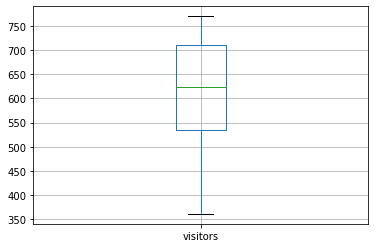

In [9]:
visitors.boxplot('visitors');

In [10]:
visitors['visitors'].describe()

count     62.000000
mean     607.290323
std      114.400560
min      361.000000
25%      534.000000
50%      624.500000
75%      710.500000
max      770.000000
Name: visitors, dtype: float64

В датасете `visitors` аномалии отсутствуют

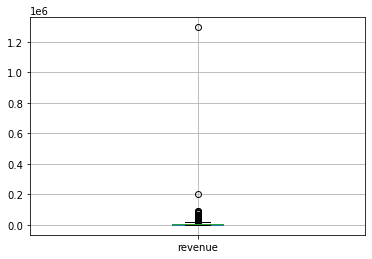

In [11]:
orders.boxplot('revenue');

In [12]:
orders['revenue'].describe()

count    1.197000e+03
mean     8.348006e+03
std      3.919113e+04
min      5.000000e+01
25%      1.220000e+03
50%      2.978000e+03
75%      8.290000e+03
max      1.294500e+06
Name: revenue, dtype: float64

В датасете `orders` имеются выбросы по столбцу `revenue`. Будем с нами работать при проверке гипотез

## Приоретизация гипотез

### Приоретизация гипотез по ICE

Выведем датасет `hypothesis`

In [13]:
hypothesis

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


Добавим новый столбец и отсортируем по убыванию ICE

In [14]:
hypothesis['ice'] = hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']
hypothesis.sort_values(by='ice', ascending=False)

,hypothesis,reach,impact,confidence,efforts,ice
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5,16.200000
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6,13.333333
7,Добавить форму подписки на все основные страни...,10,7,8,5,11.200000
6,Показать на главной странице баннеры с актуаль...,5,3,8,3,8.000000
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3,7.000000
1,"Запустить собственную службу доставки, что сок...",2,5,4,10,2.000000
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3,1.333333
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8,1.125000
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1,1.000000


**Вывод:** Наиболее перспективные гипотезы по ICE: 
- Запустить акцию, дающую скидку на товар в день рождения,
- Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей,
- Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок.

### Приоретизация гипотез по RICE

Добавим новый столбец и отсортируем по убыванию RICE

In [15]:
hypothesis['rice'] = hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']
hypothesis.sort_values('rice', ascending=False)

,hypothesis,reach,impact,confidence,efforts,ice,rice
7,Добавить форму подписки на все основные страни...,10,7,8,5,11.200000,112.0
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3,7.000000,56.0
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6,13.333333,40.0
6,Показать на главной странице баннеры с актуаль...,5,3,8,3,8.000000,40.0
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5,16.200000,16.2
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8,1.125000,9.0
1,"Запустить собственную службу доставки, что сок...",2,5,4,10,2.000000,4.0
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3,1.333333,4.0
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1,1.000000,3.0


**Вывод:** Наиболее перспективные гипотезы по RICE: 
- Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок,
- Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа,
- Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей.

### Общий вывод
- Результаты приоретизации гипотез по методам ICE и RICE отличаются,
- Две гипотезы 'Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок' и 'Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей' повторяются. Можно взять обе гипотезы на вооружение,
- Гипотеза 'Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылокй' в RICE попала на первое местоо, чем в ICE (3-е место) в связи с высоким показателем Reach в 10 баллов.

## Анализ A/B-теста

Мы провели A/B-тест и получили результаты, которые описаны в файлах `/datasets/orders.csv` и `/datasets/visitors.csv`. Чтобы исключить проблему "подсматривания" (`peeking problem`), когда результаты случайно искажаются выбросами, и из-за наглядной сложности определить, какой из графиков по дням лучше, построим ряд кумулятивных графиков и проанализируем их.

### Анализ кумулятивных данных

#### Проверка на пересечения

Пользователи, которые попали одновременно в группу А и группу В должны быть обнаружены и исключены из результатов эксперимента, чтобы не искажать картину

In [16]:
orders

,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


Посчитаем количество пользователей, принадлежащих двум группам сразу

In [17]:
orders.groupby('visitor_id')['group'].nunique().reset_index().query('group > 1').count()

visitor_id    58
group         58
dtype: int64

Получили 58 пользователей, которые участвовали в группах А и В

#### Подготовка данных для анализа

Формируем список пересекающихся пользователей их основного датасета

In [18]:
cross_users = orders.groupby('visitor_id')['group'].nunique().reset_index().query('group > 1')
cross_users.head(5)

,visitor_id,group
2,8300375,2
44,199603092,2
51,232979603,2
55,237748145,2
66,276558944,2


Подготовим один датасет из двух файлов `orders` и `visits`.

In [19]:
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime (x, '%Y-%m-%d'))
visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime (x, '%Y-%m-%d'))

Исключим пересекающихся юзеров

In [20]:
orders = orders.loc[~orders['visitor_id'].isin(cross_users['visitor_id'])]

Создадим массив уникальных пар значений дат и групп теста методом `drop_duplicates()`

In [21]:
datesGroups = orders[['date', 'group']].drop_duplicates()
datesGroups

,date,group
0,2019-08-15,B
7,2019-08-15,A
45,2019-08-16,A
47,2019-08-16,B
55,2019-08-01,A
...,...,...
1068,2019-08-12,A
1114,2019-08-13,B
1116,2019-08-13,A
1149,2019-08-14,B


Соберем агрегированные кумулятивные по дням данные о заказах. Получим строки таблицы `orders`, дата которых меньше или равна дате элемента из `datesGroups`, а группа теста равна `datesGroups`. Агрегируем значения:
- вычислим максимальную дату,
- для группы рассчитаем максимум (несмотря на то, что она будет определенной, сделаем, чтобы столбец `group` не исчез из итогового вывода,
- найдем число уникальных ID пользователя,
- посчитаем сумму средних чеков,
- применим к каждой строке датасета apply(axis=1),
- отсортируем результаты по столбцам `date` и `group`.

In [22]:
ordersAggregated = datesGroups.apply(
                                    lambda x: orders[np.logical_and(orders['date'] <= x['date'], 
                                                                    orders['group'] == x['group'])]\
                                                                    .agg({'date' : 'max', 
                                                                          'group' : 'max', 
                                                                          'transaction_id' : 'nunique', 
                                                                          'visitor_id' : 'nunique', 
                                                                          'revenue' : 'sum'}), axis=1)\
                                                                          .sort_values(by=['date','group'])
ordersAggregated

,date,group,transaction_id,visitor_id,revenue
55,2019-08-01,A,23,19,142779
66,2019-08-01,B,17,17,59758
175,2019-08-02,A,42,36,234381
173,2019-08-02,B,40,39,221801
291,2019-08-03,A,66,60,346854
...,...,...,...,...,...
533,2019-08-29,B,510,490,4746610
757,2019-08-30,A,460,437,3311413
690,2019-08-30,B,531,511,4955833
958,2019-08-31,A,468,445,3364656


Соберем агрегированные данные по посетителям интернет-магазина 

In [23]:
visitorsAggregated = datesGroups.apply(
                     lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], 
                                                       visitors['group'] == x['group'])]
                                                       .agg({'date' : 'max', 
                                                             'group' : 'max', 
                                                             'visitors' : 'sum'}), axis=1)\
                                                             .sort_values(by=['date','group'])
visitorsAggregated

,date,group,visitors
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845
...,...,...,...
533,2019-08-29,B,17708
757,2019-08-30,A,18037
690,2019-08-30,B,18198
958,2019-08-31,A,18736


Объединим обе таблицы в одну и сформируем названия столбцов для дальнейших расчетов. Создадим массив уникальных пар значений дат и групп теста

In [24]:
datesGroups = orders[['date', 'group']].drop_duplicates()
datesGroups

,date,group
0,2019-08-15,B
7,2019-08-15,A
45,2019-08-16,A
47,2019-08-16,B
55,2019-08-01,A
...,...,...
1068,2019-08-12,A
1114,2019-08-13,B
1116,2019-08-13,A
1149,2019-08-14,B


Объединим кумулятивные данные в одной таблице и присвоим ее столбцам названия для дальнейшего анализа

In [25]:
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']
cumulativeData

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,23,19,142779,719
1,2019-08-01,B,17,17,59758,713
2,2019-08-02,A,42,36,234381,1338
3,2019-08-02,B,40,39,221801,1294
4,2019-08-03,A,66,60,346854,1845
...,...,...,...,...,...,...
57,2019-08-29,B,510,490,4746610,17708
58,2019-08-30,A,460,437,3311413,18037
59,2019-08-30,B,531,511,4955833,18198
60,2019-08-31,A,468,445,3364656,18736


#### График кумулятивной выручки по группам

Сформируем датафрейм с кумулятивным кол-вом выручки по дням в группах А и В. Сформируем датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группах A и B

In [26]:
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

In [27]:
display(cumulativeRevenueA.head(5))
display(cumulativeRevenueB.head(5))

,date,revenue,orders
0,2019-08-01,142779,23
2,2019-08-02,234381,42
4,2019-08-03,346854,66
6,2019-08-04,388030,77
8,2019-08-05,474413,99


,date,revenue,orders
1,2019-08-01,59758,17
3,2019-08-02,221801,40
5,2019-08-03,288850,54
7,2019-08-04,385740,68
9,2019-08-05,475648,89


Построим график кумулятивной выручки по группам A и B

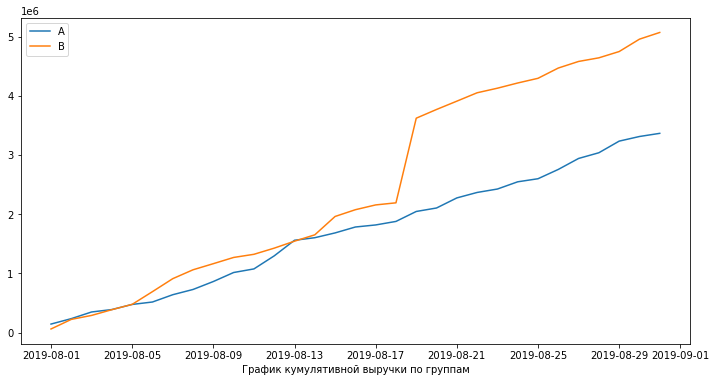

In [28]:
f = plt.figure()
f.set_figwidth(12)
f.set_figheight(6)


plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A');
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B');
plt.legend();
plt.xlabel('График кумулятивной выручки по группам');

**Вывод**


Выручка равномерно увеличивается в течение всего теста. У группы `B` наблюдается резкий скачок в период с 2019-08-17 по 2019-08-21, это может говорить о всплеске числа заказов или о появлении очень дорогих заказов в выборке. Необходимо проанализировать выбросы


#### График кумулятивного среднего чека по группам

Для расчета среднего чека, разделим кумулятивную выручку на кумулятивное кол-во заказов

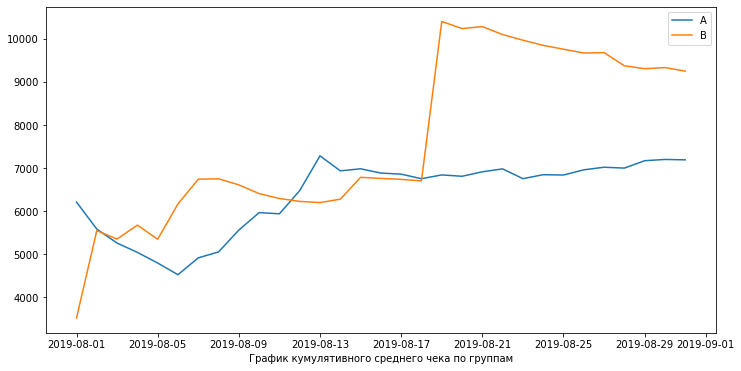

In [29]:
f = plt.figure()
f.set_figwidth(12)
f.set_figheight(6)

plt.xlabel('График кумулятивного среднего чека по группам');

plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'] / cumulativeRevenueA['orders'], label='A');
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'] / cumulativeRevenueB['orders'], label='B');
plt.legend();

**Вывод**

Ближе к концу теста средний чек в группе `B` резко растет. Возможно в группу `B` привлечен клиент(ы), который совершил покупку на большую сумму

#### График относительного изменения кумулятивного среднего чека группы B к группе A

Построим график относительного изменения кумулятивного среднего чека. Добавим горизонтальную ось методом axhline() (от англ. horizontal line across the axis, «горизонтальная линия поперек оси»). Соберем данные в одном датафрейме

In [30]:
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A','B'])
mergedCumulativeRevenue.head(5)

,date,revenueA,ordersA,revenueB,ordersB
0,2019-08-01,142779,23,59758,17
1,2019-08-02,234381,42,221801,40
2,2019-08-03,346854,66,288850,54
3,2019-08-04,388030,77,385740,68
4,2019-08-05,474413,99,475648,89


Строим отношение средних чеков

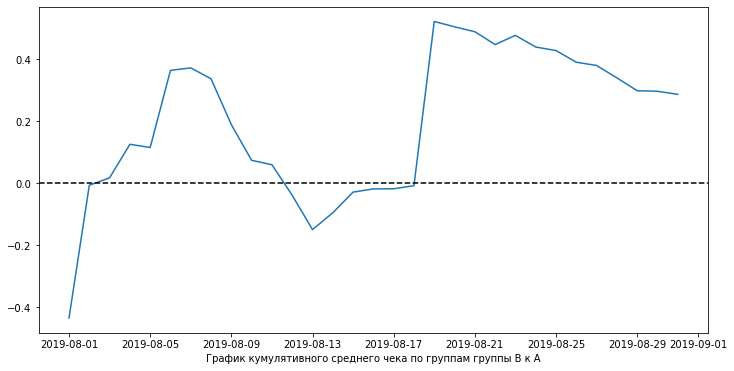

In [31]:
f = plt.figure()
f.set_figwidth(12)
f.set_figheight(6)

plt.xlabel('График кумулятивного среднего чека по группам группы B к А');
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB']) / (mergedCumulativeRevenue['revenueA'] / mergedCumulativeRevenue['ordersA']) - 1);

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--');

**Вывод**

В нескольких точках график различия между сегментами резко меняется. Причиной могут быть крупные заказы и выбросы

#### График кумулятивной конверсии по группам

Добавим расчет кумулятивной конверсии в датасет `cumulativeData`

In [32]:
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']
cumulativeData

,date,group,orders,buyers,revenue,visitors,conversion
0,2019-08-01,A,23,19,142779,719,0.031989
1,2019-08-01,B,17,17,59758,713,0.023843
2,2019-08-02,A,42,36,234381,1338,0.031390
3,2019-08-02,B,40,39,221801,1294,0.030912
4,2019-08-03,A,66,60,346854,1845,0.035772
...,...,...,...,...,...,...,...
57,2019-08-29,B,510,490,4746610,17708,0.028801
58,2019-08-30,A,460,437,3311413,18037,0.025503
59,2019-08-30,B,531,511,4955833,18198,0.029179
60,2019-08-31,A,468,445,3364656,18736,0.024979


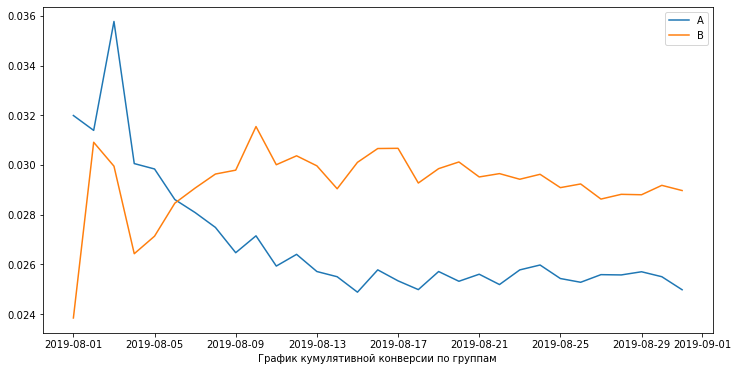

In [33]:
# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
f = plt.figure()
f.set_figwidth(12)
f.set_figheight(6)
plt.xlabel('График кумулятивной конверсии по группам');

plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend();

**Вывод**

В начале запущенного A/B-теста у группы `B`конверсия являлась сильно волатильной, затем выровнялась. У группы `A` в начале теста конверсия превышала по показателям группу `B`, но затем произошло резкое снижение и выравнивание. По результатам видно, что конверсия группы `B` имеет показатели выше, чем группа `A`

#### График кумулятивной конверсии группы B к группе A

Построим график относительного различия между группами. Объединим таблицы `cumulativeDataA` и `cumulativeDataB` методом merge() так, чтобы она содержала столбцы: `['date', 'conversionA', 'conversionB']`. Сохраним в переменной `mergedCumulativeConversions`.

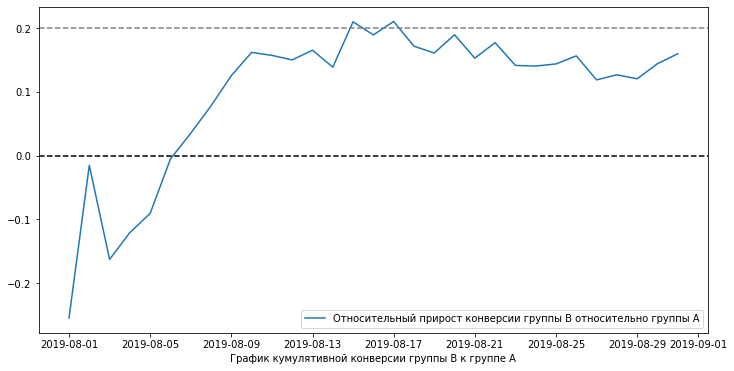

In [34]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# строим графики
f = plt.figure()
f.set_figwidth(12)
f.set_figheight(6)
plt.xlabel('График кумулятивной конверсии группы B к группе A');

plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")
plt.legend();

plt.axhline(y=0, color='black', linestyle='--');
plt.axhline(y=0.2, color='grey', linestyle='--');


**Вывод**

В течение нескольких дней после запуска теста, группа `B` показывает стабильно выше результаты, чем группа `A`. Прирост балансирует в пределах 10-15%

### Анализ выбросов, всплесков, аномалий

#### Точечный график количества заказов по пользователям

При проведении А/B-теста не исключены аномально высокие или низкие показатели, которые искажают истинные результаты теста и приводят к неверным выводам. Посмотрим, какие выбросы имеются в количестве заказов по пользователям

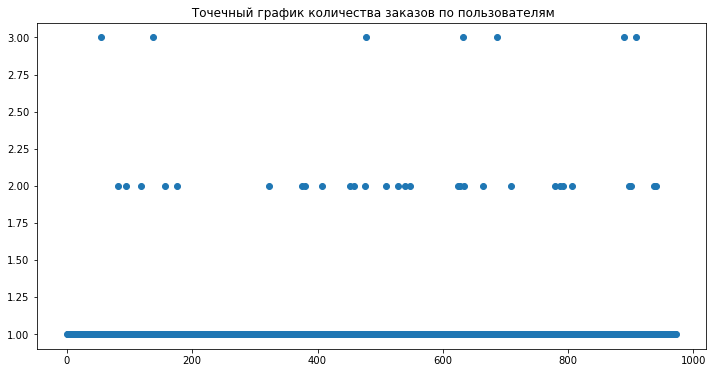

In [35]:
ordersByUsers = (
    orders.groupby('visitor_id', as_index=False)
    .agg({'transaction_id': 'nunique'})
)
ordersByUsers.columns = ['transaction_id', 'orders']

ordersByUsers.sort_values(by='orders', ascending=False).head(10)

# серия из чисел от 0 до количества наблюдений в ordersByUsers
x_values = pd.Series(range(0, len(ordersByUsers)))

# строим графики
fig, ax = plt.subplots()
fig.set_figwidth(12)
fig.set_figheight(6)
ax.set_title(' Точечный график количества заказов по пользователям') 

plt.scatter(x_values, ordersByUsers['orders']);

**Вывод**

Пользователей, совершивших заказ более двух раз мало. Доля пользователей с заказами более 2-х незначительная. Этих пользователей можно считать аномальными. Чтобы понять, являются ли совершение двух заказов одним пользователем нормальным явлением или нет, посчитаем выборочные перцентили <a id="orders_perc_count"></a>

#### Расчет 95-го и 99-го перцентилей количества заказов на пользователя. Выбор границы для определения аномальных пользователей 

Посчитаем выборочные перцентили (95 и 99) количества заказов на одного пользователя

In [36]:
np.percentile(ordersByUsers['orders'], [95, 99])

array([1., 2.])

**Вывод**

Не более 5% пользователей оформляли более чем 1 заказа. Не более 1% пользователей совершили более 1-х заказа. В данном случае стоит выбрать верхнюю границу числа заказов в размере 2-х заказов, отсеяв, тем самым, аномальных пользователей по ней

#### Точечный график стоимостей заказов

Для начала построим гистограмму распределения стоимости заказов

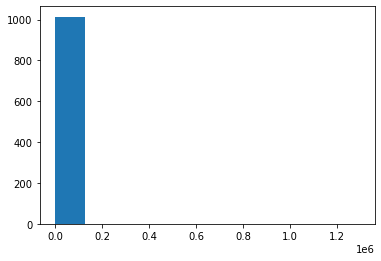

In [37]:
plt.hist(orders['revenue']);

При визуальной оценке выбросы отсутсвуют. Построим точечный график распределения стоимостей заказов, оценим наличие выбросов

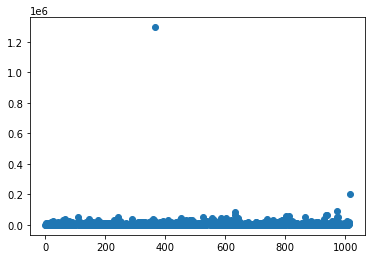

In [38]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue']);

**Вывод**

Дорогие заказы присутствуют, но их единицы. Однако их нужно учитывать в качестве выбросов <a id="orders_perc"></a>

#### Расчет 95-го и 99-го перцентилей стоимости заказов (средних чеков)

Посчитаем выборочные перцентили (95 и 99) стоимости заказов

In [39]:
np.percentile(orders['revenue'], [95, 99])

array([26785., 53904.])

**Вывод**

Не более 5% заказов дороже 26 785 рублей и не более 1% дороже 53 904 рублей.

### Статистическая значимость различий

Мы оценили результаты A/B-теста визуально, обнаружили выбросы и нашли границу для их определения. Посчитаем статистическую значимость различий между группами по «сырым» данным — без удаления аномальных пользователей. Для начала подготовим данные

In [40]:
# расчет Daily visitors группы А
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
                        lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
                        {'date':'max', 'visitorsPerDateA':'sum'}
                        ), axis=1,

)

visitorsACummulative.columns = ['date', 'visitorsCummulativeA']


# расчет Daily visitors группы В
visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']


# расчет Daily orders группы А
ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]


# расчет Daily orders группы B
ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]


# Объединение данных в один датасет
data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

data.head(5)

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,23,142779,17,59758,23,142779,17,59758,719,713,719,713
1,2019-08-02,19,91602,23,162043,42,234381,40,221801,619,581,1338,1294
2,2019-08-03,24,112473,14,67049,66,346854,54,288850,507,509,1845,1803
3,2019-08-04,11,41176,14,96890,77,388030,68,385740,717,770,2562,2573
4,2019-08-05,22,86383,21,89908,99,474413,89,475648,756,707,3318,3280


#### Статистическая значимость различий в среднем количестве заказов между группами по «сырым» данным

Сформулируем нулевую и альтернативную гипотезы:
- H0: статистически значимых различий по "сырым" данным в среднем числе заказов между группами А и В нет. Другими словами, что наблюдаемые различия случайны. И мы надеемся опровергнуть данную гипотезу,
- H1: имеются статистически значимые различия по "сырым" данным в среднем числе заказов между группами А и В.

Начнем проверку гипотез. Соберем заказы по пользователям из групп A и В

In [41]:
# заказы по пользователям группы А
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitor_id', 'orders']

# заказы по пользователям группы В
ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitor_id', 'orders']

Объявим переменные `sampleA` и `sampleB`, в которых пользователям из разных групп будет соответствовать количество заказов. Тем, кто ничего не заказал, будут соответствовать нули. Это нужно, чтобы подготовить выборки к проверке критерием Манна-Уитни. Данный критерий используем потому, что в данных имеются выбросы. Поэтому обычно применяются непараметрические критерии, в частности критерий Манна-Уитни для проверки, что распределения двух выборок не отличаются.

Переменная `sampleA` будет состоять из двух частей:
- Список с количеством заказов для каждого из пользователей: `ordersByUsersA['orders']` и `ordersByUsersB['orders']`.
- Нули для пользователей, которые ничего не заказывали. Их количество равно разнице между суммой посетителей и количеством записей о заказах: `data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])` и `data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])`. Создадим объект `pd.Series` нужной длины:


In [42]:
# для группы А
pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')
 
# для группы В
pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')
 

0        0
1        0
2        0
3        0
4        0
        ..
18383    0
18384    0
18385    0
18386    0
18387    0
Name: orders, Length: 18388, dtype: int64

Объединим последовательности функцией pd.concat(), передав сначала то, что объединяют — в нашем случае список из первой и второй части:

In [43]:
[ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')]

[0      1
 1      1
 2      1
 3      1
 4      1
       ..
 440    1
 441    1
 442    1
 443    1
 444    1
 Name: orders, Length: 445, dtype: int64,
 0        0
 1        0
 2        0
 3        0
 4        0
         ..
 18286    0
 18287    0
 18288    0
 18289    0
 18290    0
 Name: orders, Length: 18291, dtype: int64]

А затем передадим аргумент, сообщающий, что объекты Series нужно объединить по строкам (то есть записать подряд): `pd.concat([...], axis=0)`. 

In [44]:
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleA

0        1
1        1
2        1
3        1
4        1
        ..
18286    0
18287    0
18288    0
18289    0
18290    0
Name: orders, Length: 18736, dtype: int64

In [45]:
sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)
sampleB

0        1
1        1
2        1
3        1
4        1
        ..
18383    0
18384    0
18385    0
18386    0
18387    0
Name: orders, Length: 18916, dtype: int64

Поскольку в sampleA (sampleВ) сохранена выборка, где каждый элемент — число заказов определённого пользователя, в том числе ноль. Тогда число элементов sampleA (sampleВ) — это количество пользователей, сумма всех элементов — количество заказов. 
- Чтобы получить среднее число заказов на пользователя, поделим сумму заказов на число пользователей — найдём среднее в выборке sampleA (sampleВ) методом mean(),
- Применим критерий и отформатируем p-value, округлив его до трёх знаков после запятой,
- Выведем относительный прирост среднего числа заказов группы B: `среднее число заказов группы B / среднее число заказов группы A - 1`. Округлим до трёх знаков после запятой.

In [46]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitor_id', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitor_id', 'orders']

sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

display('p-value:', "{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))
display('-'*80)

display('уровень относительного выигрыша B по отношению к А:', "{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))


'p-value:'

'0.011'

'--------------------------------------------------------------------------------'

'уровень относительного выигрыша B по отношению к А:'

'0.160'

**Вывод**

По «сырым» данным имеются различия в среднем числе заказов групп A и B, т.к.: <a id="stat1"></a>
- `p-value` = `0.011` меньше `0.05`. Значит, **отвергаем нулевую гипотезу** о том, что статистически значимых различий в среднем числе заказов между группами нет. 
- Группа `B` имеет относительный выигрыш в размере `16.0%`.

#### Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным

Сформулируем нулевую и альтернативную гипотезы:
- H0: различий в среднем чеке между группами нет. Другими словами, что наблюдаемые различия случайны. И мы надеемся опровергнуть данную гипотезу,
- H1: различия в среднем чеке между группами есть.

Чтобы рассчитать статистическую значимость различий в среднем чеке, передадим критерию mannwhitneyu() данные о выручке с заказов.
И найдём относительные различия в среднем чеке между группами <a id="stat2"></a>

In [47]:
display('p-value:', '{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
display('-'*80)

display('уровень относительного выигрыша B по отношению к А:', '{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

'p-value:'

'0.829'

'--------------------------------------------------------------------------------'

'уровень относительного выигрыша B по отношению к А:'

'0.287'

**Вывод**

Принимаем нулевую гипотезу. Оснований считать, что в среднем чеке есть различия - нет, т.к.:
- `p-value` значительно больше `0.05`,
- Средний чек группы `B` значительно выше среднего чека группы `A` на 28,7%.

#### Статистическая значимость различий в среднем количестве заказов между группами по «очищенным» данным

Сформулируем нулевую и альтернативную гипотезы:
- H0: статистически значимых различий по "очищенным" данным в среднем числе заказов между группами А и В нет. Другими словами, что наблюдаемые различия случайны. И мы надеемся опровергнуть данную гипотезу,
- H1: имеются статистически значимые различия по "очищенным" данным в среднем числе заказов между группами А и В.

Найденные ранее 95-й и 99-й перцентили [средних чеков](#orders_perc)  равны 26 785 и 53 904 рублям соответственно. А 95-й и 99-й перцентили [количества заказов](#orders_perc_count) на одного пользователя равны 1 и 2 заказа на пользователя.

- Примем за аномальных пользователей тех, кто совершил от 2 заказов или совершил заказ дороже 53 904 рублей,
- Сделаем срезы пользователей с числом заказов больше 2 — `usersWithManyOrders` и пользователей, совершивших заказы дороже 53 904 — `usersWithExpensiveOrders`,
- Объединим их в таблице abnormalUsers,
- Узнаем, сколько всего аномальных пользователей атрибутом shape.

In [52]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 2]['visitor_id'],
        ordersByUsersB[ordersByUsersB['orders'] > 2]['visitor_id'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 26785]['visitor_id']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
display('Вывод ID пользователей', abnormalUsers.head(5))
display('-'*80)

display('Аномальных пользователей:', abnormalUsers.shape[0])

'Вывод ID пользователей'

568     113298937
1099    148427295
928     204675465
33      249864742
684     358944393
Name: visitor_id, dtype: int64

'--------------------------------------------------------------------------------'

'Аномальных пользователей:'

58

Всего `58` аномальных пользователей.

Узнаем, как их действия повлияли на результаты теста. Посчитаем статистическую значимость различий в среднем количестве заказов между группами теста по очищенным данным. Сначала подготовим выборки количества заказов по пользователям по группам теста:

In [49]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitor_id'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitor_id'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

Применим статистический критерий Манна-Уитни к полученным выборкам

In [50]:
display('p-value:', '{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
display('-'*80)

display('уровень относительного выигрыша B по отношению к А:', '{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

'p-value:'

'0.009'

'--------------------------------------------------------------------------------'

'уровень относительного выигрыша B по отношению к А:'

'0.189'

**Вывод**

По "очищенным" данным имеются различия в среднем числе заказов групп A и B, т.к.:
- `p-value` = `0.013` меньше `0.05`. Значит, **отвергаем нулевую** гипотезу о том, что статистически значимых различий в среднем числе заказов между группами нет (по ["сырым данным"](#stat1) данный показатель составил `0.011`),
- Группа `B` имеет относительный выигрыш в размере `18.9%` - доля выросла по сравнению с "сырыми данными". По ["сырым данным"](#stat1) данный показатель составил `16.0%`.

#### Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным

Изучим, что произошло с результатами по среднему чеку

In [51]:
display('p-value:',
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

display('-'*80)

display('уровень относительного выигрыша B по отношению к А:',
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

'p-value:'

'0.762'

'--------------------------------------------------------------------------------'

'уровень относительного выигрыша B по отношению к А:'

'-0.022'

**Вывод**

Принимаем нулевую гипотезу. Оснований считать, что в среднем чеке есть различия - нет, т.к.:
- `p-value` значительно больше `0.05` и составляет `0.762` - увеличился в сравнении с "сырыми" данными, (по ["сырым данным"](#stat2) данный показатель составил `0.829`),
- Однако, по "очищенным" данным разница между сегментами сократилась с `25.9%` до `2%`. По ["сырым данным"](#stat2) данный показатель составил `28.7%`. Это говорит о том, что аномалии и выбросы оказали влияние на результаты

### Общий вывод

1. По среднему количеству заказов имеется статистически значимое различие между группами как по "сырым" данным, так и по "очищенным". Это значит, что данных набрано достаточно, чтобы сделать выводы об успешности теста,
2. Нет статистически значимого различия по среднему чеку между группами ни по "сырым", ни по "очищенным" данным,
3. График различия конверсии между группами сообщает, что результаты группы `B` лучше группы `A`:
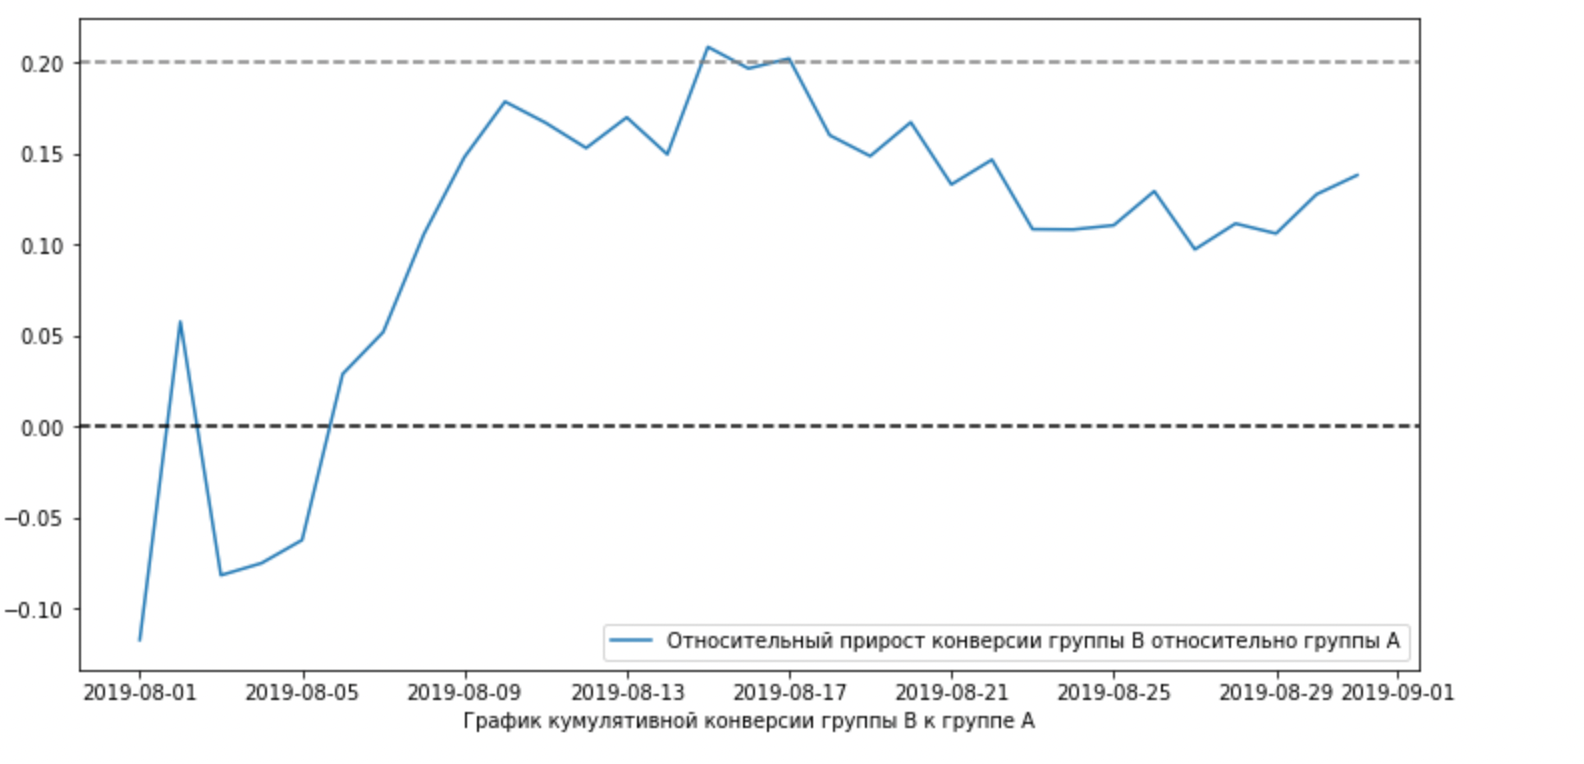
4. График различия среднего чека говорит о том, что результаты группы `B` имели волатильность во время теста, но по итогам оказались на 30% лучше группы `A`:


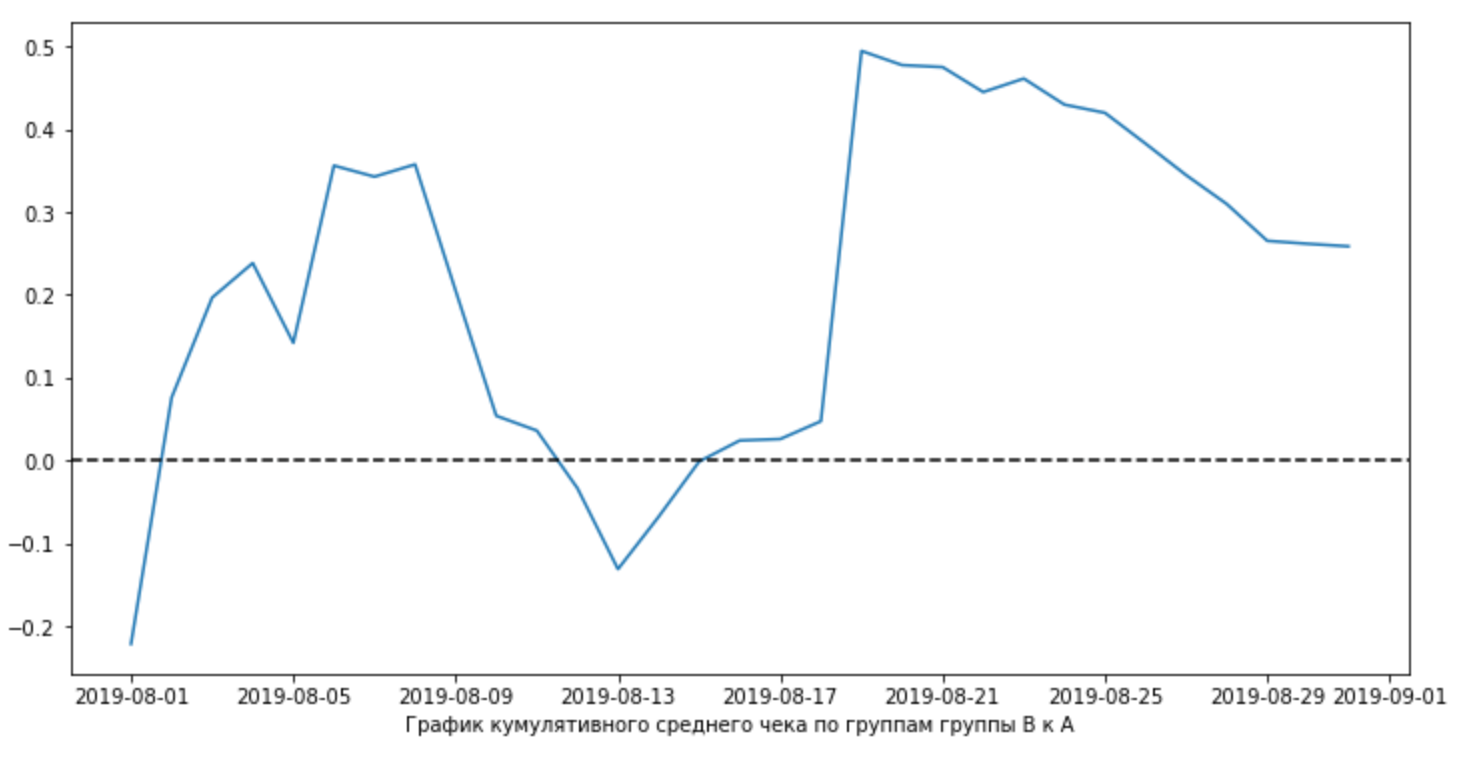
5. Исходя из обнаруженных фактов, тест следует остановить, признать успешным и зафиксировать результат. Несмотря на то, что по среднему чеку результат не является статистически значимым, можем основываться на имеющихся статистически значимых отличиях в данных по количеству заказов. Сегмент `B` показал результаты лучше сегмента `A`.